In [1]:
import torch
print(torch.__version__)

2.7.0


In [2]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(f"Using device = {device}")

Using device = mps


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('data/linear_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


In [5]:
# View the top 5 entries
df.head()

,X,y
0,-1.00,-0.220770
1,-0.98,-0.200901
2,-0.96,-0.181032
3,-0.94,-0.161163
4,-0.92,-0.141294


In [6]:
# View the bottom 5 entries 
df.tail()

,X,y
95,0.90,1.666785
96,0.92,1.686654
97,0.94,1.706523
98,0.96,1.726392
99,0.98,1.746261


In [7]:
# View the describe
df.describe()

,X,y
count,100.00000,100.000000
mean,-0.01000,0.762746
std,0.58023,0.576429
min,-1.00000,-0.220770
25%,-0.50500,0.270988
50%,-0.01000,0.762746
75%,0.48500,1.254503
max,0.98000,1.746261


In [8]:
X = torch.Tensor(df['X'].values)
y = torch.Tensor(df['y'].values)
print("Type of X = ",type(X))
print("Type of y = ",type(y))

Type of X =  <class 'torch.Tensor'>
Type of y =  <class 'torch.Tensor'>


In [9]:
# Split the training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train = {X_train.shape} and y_train = {y_train.shape}")
print(f"Shape of X_test = {X_test.shape} and y_test = {y_test.shape}")

Shape of X_train = torch.Size([80]) and y_train = torch.Size([80])
Shape of X_test = torch.Size([20]) and y_test = torch.Size([20])


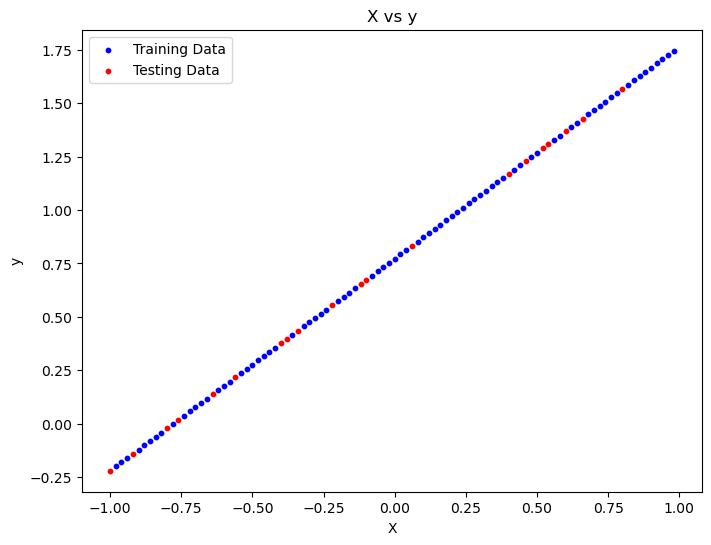

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, c='b', s=10, label='Training Data')
plt.scatter(X_test, y_test, c='r', s=10, label='Testing Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
plt.legend()
plt.savefig('X vs y.png')
plt.show();

In [11]:
# Create Neural Network
from torch import nn
class HamroNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    def forward(self, x):
       return self.weights*x + self.bias

In [12]:
torch.manual_seed(42)
model = HamroNetwork()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
with torch.inference_mode():
    y_preds = model(X_test)

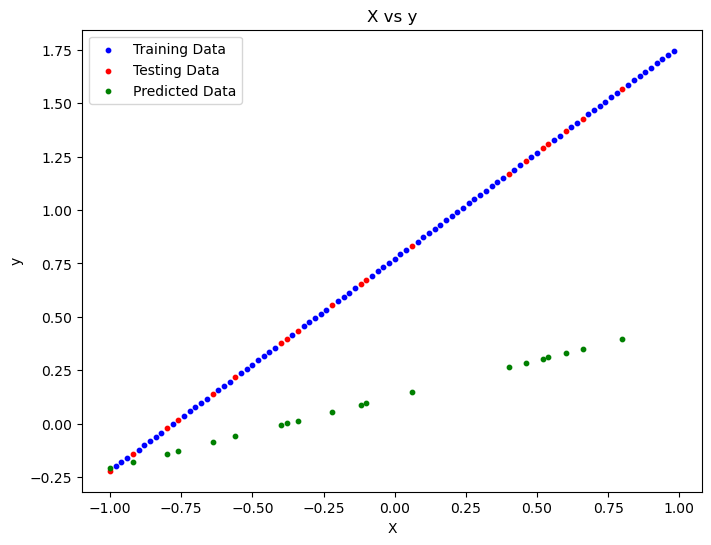

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, c='b', s=10, label='Training Data')
plt.scatter(X_test, y_test, c='r', s=10, label='Testing Data')
plt.scatter(X_test, y_preds, c='g', s=10, label='Predicted Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
plt.legend()
plt.savefig('X vs y.png')
plt.show();

In [15]:
# Set up Loss Function and Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(
    params=model.parameters(), lr=0.01
)

In [16]:
# Training Loop
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model.to(device)
trainLossList = []
testLossList = []
for epoch in range(epochs):
    ### Training
    model.train()
    # Forward Pass
    train_preds = model(X_train)
    # Compute Trainig Loss
    loss = loss_fn(y_train, train_preds)
    # Zero Grad Optimizer
    optimizer.zero_grad()
    # Backpropagate
    loss.backward()
    # Step the Optimizer
    optimizer.step()
    ### Testing
    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(y_test, test_preds)
    if (epoch+1)%20 == 0:
        print(f"Epoch:{epoch+1}|Train Loss:{loss:.4f}|Test Loss:{test_loss:.4f}")
    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())

Epoch:20|Train Loss:0.3078|Test Loss:0.2371
Epoch:40|Train Loss:0.1712|Test Loss:0.1312
Epoch:60|Train Loss:0.1024|Test Loss:0.0796
Epoch:80|Train Loss:0.0656|Test Loss:0.0525
Epoch:100|Train Loss:0.0445|Test Loss:0.0370
Epoch:120|Train Loss:0.0315|Test Loss:0.0272
Epoch:140|Train Loss:0.0230|Test Loss:0.0205
Epoch:160|Train Loss:0.0171|Test Loss:0.0156
Epoch:180|Train Loss:0.0129|Test Loss:0.0120
Epoch:200|Train Loss:0.0097|Test Loss:0.0092
Epoch:220|Train Loss:0.0074|Test Loss:0.0071
Epoch:240|Train Loss:0.0056|Test Loss:0.0055
Epoch:260|Train Loss:0.0043|Test Loss:0.0042
Epoch:280|Train Loss:0.0033|Test Loss:0.0032
Epoch:300|Train Loss:0.0025|Test Loss:0.0025
Epoch:320|Train Loss:0.0019|Test Loss:0.0019
Epoch:340|Train Loss:0.0015|Test Loss:0.0015
Epoch:360|Train Loss:0.0011|Test Loss:0.0011
Epoch:380|Train Loss:0.0009|Test Loss:0.0009
Epoch:400|Train Loss:0.0007|Test Loss:0.0007
Epoch:420|Train Loss:0.0005|Test Loss:0.0005
Epoch:440|Train Loss:0.0004|Test Loss:0.0004
Epoch:460|Trai

In [17]:
with torch.inference_mode():
    y_preds = model(X_test)

In [18]:
def plot(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,y_preds=None):
    plt.figure(figsize=(8,6))
    plt.scatter(X_train.cpu(), y_train.cpu(), c='b', s=10, label='Training Data')
    plt.scatter(X_test.cpu(), y_test.cpu(), c='r', s=10, label='Testing Data')
    if y_preds is not None:
        plt.scatter(X_test.cpu(), y_preds.cpu(), c='g', s=10, label='Predicted Data')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("X vs y")
    plt.legend()
    plt.show();

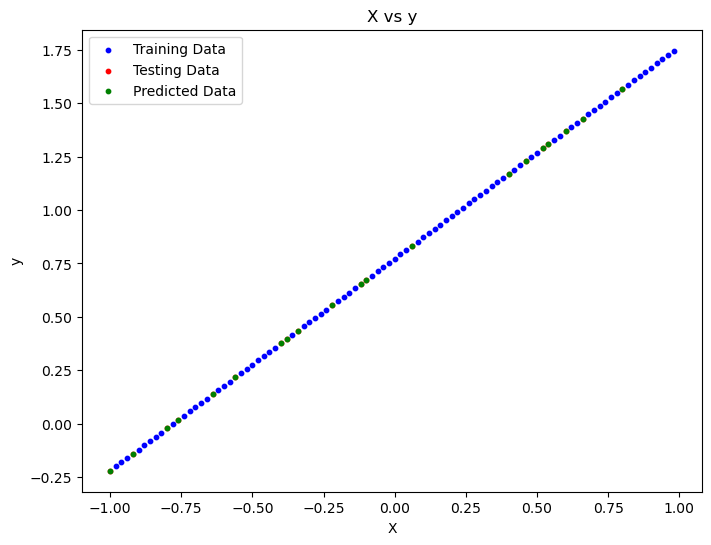

In [19]:
plot(y_preds=y_preds)

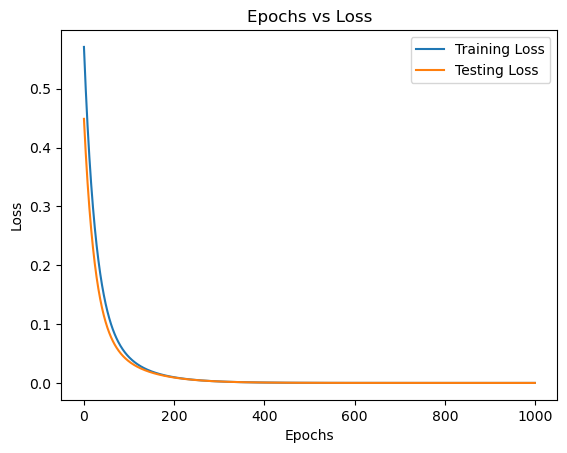

In [20]:
# plot the Epochs vs Loss plot
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [21]:
# 0.580000000000001	1.348881
test_sample = torch.tensor([0.580000000000001]).to(device)
ans = model(test_sample)
print(ans.cpu().detach().numpy())

[1.3484353]
